1st. resizing all icons by 10x10

In [150]:
from PIL import Image
icons_path = "icons/tiles/"

In [151]:
image = Image.open(icons_path + "Ahri_0.jpg")

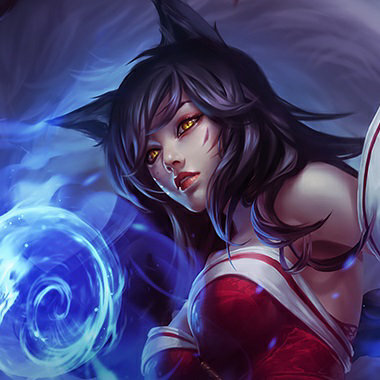

In [152]:
image

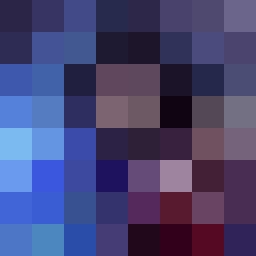

In [153]:
low_image_lanczos = image.resize((8,8), Image.Resampling.LANCZOS)

rescale = low_image_lanczos.resize((256,256), Image.Resampling.NEAREST)

rescale

8x8 we can recognize the champion now we'll take the next character Alistar and create a function to get the icon

In [239]:
def get_pixelated_icon(path, size, rescale = False):
    image = Image.open(path)
    low_image_lanczos = image.resize((size,size), Image.Resampling.LANCZOS)
    if rescale:
        return low_image_lanczos.resize((256,256), Image.Resampling.NEAREST)
    return low_image_lanczos

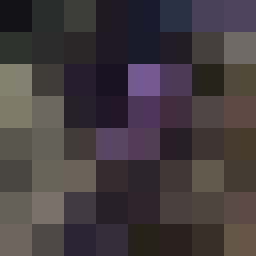

In [240]:
get_pixelated_icon(icons_path + "alistar_0.jpg", 8, True)

In [241]:
alistar_icon = get_pixelated_icon(icons_path + "alistar_0.jpg", 8, False)
ahri_icon = get_pixelated_icon(icons_path + "Ahri_0.jpg", 8, False)

In [242]:
pixels_alistar = list(alistar_icon.getdata())
pixels_ahri = list(ahri_icon.getdata())

In [243]:
def compare_pixels(pixels1, pixels2):
    len_pixels = len(pixels1)
    percentage = 0

    for i in range(len_pixels):
        r = abs(pixels1[i][0] - pixels2[i][0]) / 255
        g = abs(pixels1[i][1] - pixels2[i][1]) / 255
        b = abs(pixels1[i][2] - pixels2[i][2]) / 255
        percentage += (r + g + b) / 3
    return 1 - percentage / len_pixels

In [244]:
print(compare_pixels(pixels_alistar, pixels_ahri))

0.850204248366013


In [348]:
def compare_images(path1, path2, size):
    icon1 = get_pixelated_icon(path1, size, False)
    icon2 = get_pixelated_icon(path2, size, False)
    pixels1 = list(icon1.getdata())
    pixels2 = list(icon2.getdata())
    return compare_pixels(pixels1, pixels2)

In [349]:
compare_images(icons_path + "fiora_0.jpg", icons_path + "karthus_0.jpg", 8)

1.0

now lets take all default images from league

In [350]:
import os

images_icon_path_list = []
for filename in os.listdir(icons_path):
    if filename.endswith("_0.jpg"):
        images_icon_path_list.append(icons_path + filename)
print(images_icon_path_list)

['icons/tiles/Aatrox_0.jpg', 'icons/tiles/Ahri_0.jpg', 'icons/tiles/Akali_0.jpg', 'icons/tiles/Akshan_0.jpg', 'icons/tiles/Alistar_0.jpg', 'icons/tiles/Amumu_0.jpg', 'icons/tiles/Anivia_0.jpg', 'icons/tiles/Annie_0.jpg', 'icons/tiles/Aphelios_0.jpg', 'icons/tiles/Ashe_0.jpg', 'icons/tiles/AurelionSol_0.jpg', 'icons/tiles/Azir_0.jpg', 'icons/tiles/Bard_0.jpg', 'icons/tiles/Blitzcrank_0.jpg', 'icons/tiles/Brand_0.jpg', 'icons/tiles/Braum_0.jpg', 'icons/tiles/Caitlyn_0.jpg', 'icons/tiles/Camille_0.jpg', 'icons/tiles/Cassiopeia_0.jpg', 'icons/tiles/Chogath_0.jpg', 'icons/tiles/Corki_0.jpg', 'icons/tiles/Darius_0.jpg', 'icons/tiles/Diana_0.jpg', 'icons/tiles/Draven_0.jpg', 'icons/tiles/DrMundo_0.jpg', 'icons/tiles/Ekko_0.jpg', 'icons/tiles/Elise_0.jpg', 'icons/tiles/Evelynn_0.jpg', 'icons/tiles/Ezreal_0.jpg', 'icons/tiles/FiddleSticks_0.jpg', 'icons/tiles/Fiora_0.jpg', 'icons/tiles/Fizz_0.jpg', 'icons/tiles/Galio_0.jpg', 'icons/tiles/Gangplank_0.jpg', 'icons/tiles/Garen_0.jpg', 'icons/tiles

In [351]:
percentage_comparison_list = [[0 for i in range(len(images_icon_path_list))] for j in range(len(images_icon_path_list))]


In [352]:
def compare_all(percentage_comparison_list, images_icon_path_list):
    len_list = len(images_icon_path_list)
    for i in range(len_list):
        print("Comparing image " + str(i) + "/" + str(len_list) + " with the rest", end='\r')
        for j in range(i, len(images_icon_path_list)):
            percentage_comparison_list[i][j] = compare_images(images_icon_path_list[i], images_icon_path_list[j], 8)
            percentage_comparison_list[j][i] = percentage_comparison_list[i][j]

In [353]:
print(percentage_comparison_list)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [354]:
compare_all(percentage_comparison_list, images_icon_path_list)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [370]:
def plot_comparison_matrix(matrix):
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()
    
    im = ax.matshow(matrix, cmap='hot')
    
    fig.colorbar(im)
    
    n_images = len(matrix)
    
    plt.tight_layout()
    plt.show()

plot_comparison_matrix(np.array(percentage_comparison_list), images_icon_path_list)

TypeError: plot_comparison_matrix() takes 1 positional argument but 2 were given

In [410]:
def get_most_similar_champion(matrix, image_paths, nb=5):
   similar_pairs = []
   
   for i in range(len(matrix)):
       for j in range(i+1, len(matrix)):
           similar_pairs.append((image_paths[i], image_paths[j], matrix[i][j]))
   
   similar_pairs.sort(key=lambda x: x[2], reverse=True)
   return similar_pairs[:nb]

In [372]:
icons = get_most_similar_champion(percentage_comparison_list, images_icon_path_list)


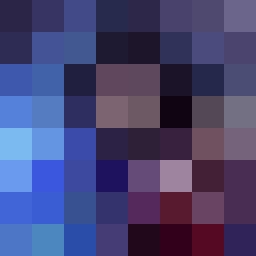

In [373]:
get_pixelated_icon(icons[0], 8, True)


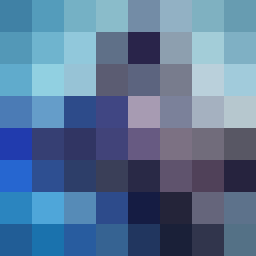

In [374]:
get_pixelated_icon(icons[1], 8, True)

as I see, it's doesn't look really similar, why ?
my pixel comparator doesn't take human eyes perception of color
hue and saturation will be more important that brightness by example

![image.png](images\image.png)

In [397]:
def compare_pixels(pixels1,pixels2):
    import colorsys
    len_pixels = len(pixels1)
    percentage = 0
    diff = 0
    for i in range(len_pixels):
        hsv1 = colorsys.rgb_to_hsv(pixels1[i][0]/255, pixels1[i][1]/255, pixels1[i][2]/255)
        hsv2 = colorsys.rgb_to_hsv(pixels2[i][0]/255, pixels2[i][1]/255, pixels2[i][2]/255)
        h_diff = abs(hsv1[0] - hsv2[0])
        s_diff = abs(hsv1[1] - hsv2[1])
        v_diff = abs(hsv1[2] - hsv2[2])

        diff += h_diff * 0.6 + s_diff * 0.2 + v_diff * 0.2

    return 1 - diff / len_pixels
    



In [398]:
percentage_comparison_list = [[0 for i in range(len(images_icon_path_list))] for j in range(len(images_icon_path_list))]
compare_all(percentage_comparison_list, images_icon_path_list)

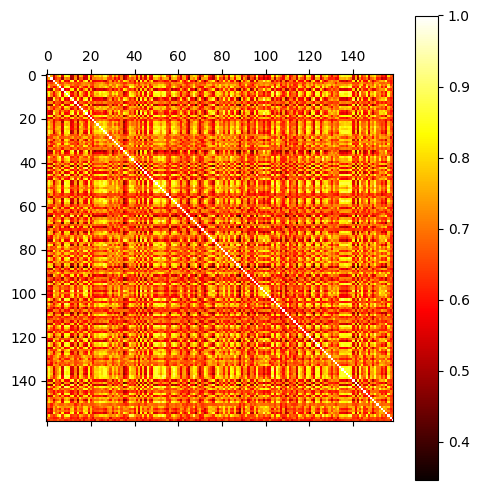

In [411]:
plot_comparison_matrix(np.array(percentage_comparison_list))

In [412]:
icons = get_most_similar_champion(percentage_comparison_list, images_icon_path_list, 5)


In [413]:
print(icons)

[('icons/tiles/Bard_0.jpg', 'icons/tiles/Renekton_0.jpg', 0.9203989885945526), ('icons/tiles/Karthus_0.jpg', 'icons/tiles/Lissandra_0.jpg', 0.9109691564879792), ('icons/tiles/Lissandra_0.jpg', 'icons/tiles/Nocturne_0.jpg', 0.9082114552513056), ('icons/tiles/Kassadin_0.jpg', 'icons/tiles/Taric_0.jpg', 0.9014745250719394), ('icons/tiles/Ivern_0.jpg', 'icons/tiles/Renekton_0.jpg', 0.9008641949077347)]


In [416]:
def show_2_images(image, image2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image)
    ax[1].imshow(image2)
    plt.show()

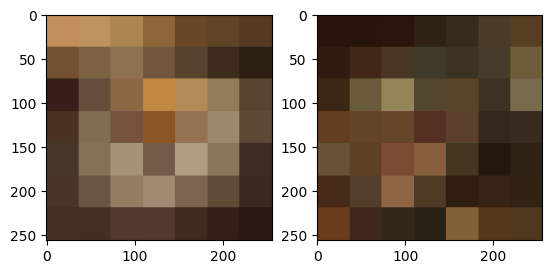

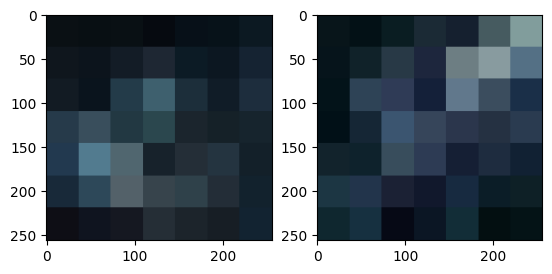

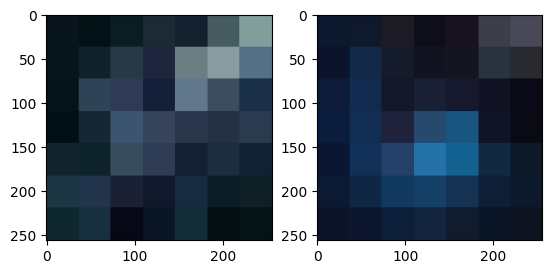

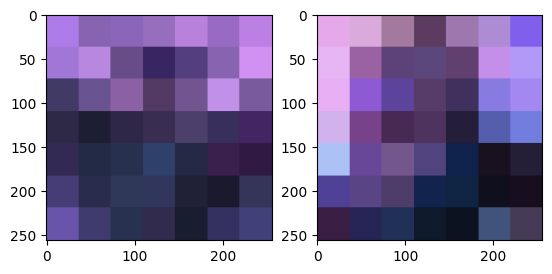

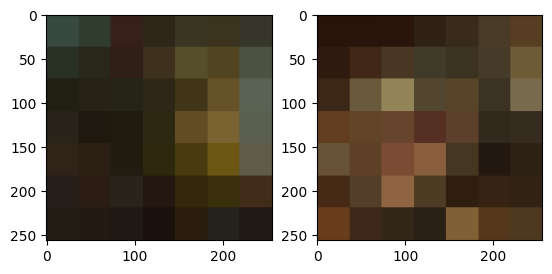

In [419]:
for i in range(len(icons)):
    scaled_image = get_pixelated_icon(icons[i][0], 7, True)
    scaled_image2 = get_pixelated_icon(icons[i][1], 7, True)
    show_2_images(scaled_image, scaled_image2)

CURRENT ISSUE, I should take as consideration similar colors in image and not similar color between same pixel location
